## 코로나 전후 배달 데이터 분석


In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')
import warnings
warnings.filterwarnings('ignore')

In [4]:
dlvr_call=pd.read_csv('/content/drive/MyDrive/2021_빅데이터_통신플랫폼/KT_빅데이터플랫폼_데이터셋/dlvr_call.csv')
shop=pd.read_csv('/content/drive/MyDrive/2021_빅데이터_통신플랫폼/KT_빅데이터플랫폼_데이터셋/StartupOrClosing_Shop.csv',encoding='CP949')
shop_region=pd.read_csv('/content/drive/MyDrive/2021_빅데이터_통신플랫폼/KT_빅데이터플랫폼_데이터셋/StartupOrClosing_Region.csv',encoding='CP949')

In [8]:
shop.head(10)

,No,DATE,INDUTY_NM,CMPNM,INDUTY_CODEM,division
0,1,20200101,CCTV,(주)실라전자,319013,1
1,2,20200101,가공식품도매(기타),송현동1986발효이야기,452199,1
2,3,20200101,가구판매(종합),더갤러리전주점,571100,1
3,4,20200101,가정부.파출부소개,모두인력파출,839103,1
4,5,20200101,가정부업알선,모두인력파출,839101,1
5,6,20200101,간병인,참사랑복지협동조합,839106,1
6,7,20200101,간판제조,조은디자인,155401,1
7,8,20200101,건강기구,족욕,582109,1
8,9,20200101,건물건설(기타),(주)제일디자인하이테크,422199,1
9,10,20200101,건물건설(종합),(주)삼현건설,422100,1


In [12]:
shop['INDUTY_NM'].value_counts().head(30)

한식          14446
부동산          8183
치킨           3260
카페           2661
미용실          2547
관리사무소        2130
건설업(종합)      2021
중국음식         2012
교회           1992
이삿짐센터        1549
무역업(종합)      1444
슈퍼마켓         1443
수도설비공사       1404
화물운송         1394
어린이집         1379
분식           1365
인테리어         1361
편의점          1270
치과           1226
초등학교         1217
자동차정비.수리     1196
노인정          1196
지게차          1179
유흥주점         1138
의류판매(종합)     1098
약국           1084
열쇠판매.수리      1079
전기공사         1060
고용알선(종합)     1017
여행사          1015
Name: INDUTY_NM, dtype: int64

In [6]:
shop_region.head(10)

,INDEX,DATE,INDUTY_NM,BRTC_NM,SIGUNGU_NM,EMD,LA_DCMLPOINT_VALUE,LO_DCMLPOINT_VALUE,DIVISION
0,1,20200101,고등학교,서울,관악구,봉천동,37.487***,126.943***,1
1,2,20200101,노인보호센터,전남,순천시 상사면,오곡리,34.909***,127.461***,1
2,3,20200101,노인생활복지시설,강원,강릉시,용강동,37.754***,128.890***,1
3,4,20200101,돼지국밥,경남,창원시 마산합포구,현동,35.147***,128.557***,1
4,5,20200101,레저용품대여,전북,군산시,비응도동,35.939***,126.529***,1
5,6,20200101,보일러판매,대전,중구,목동,36.336***,127.403***,1
6,7,20200101,부동산,경기,용인시 처인구,봉명리,37.109***,127.131***,1
7,8,20200101,소방서,경기,화성시 서신면,상안리,37.168***,126.699***,1
8,9,20200101,토목공학엔지니어링,인천,서구,오류동,37.598***,126.613***,1
9,10,20200101,토목공학엔지니어링,인천,서구,오류동,37.598***,126.613***,1


In [13]:
shop_region['INDUTY_NM'].value_counts()

한식            3173
부동산           2457
치킨             998
교회             969
미용실            927
              ... 
증권거래소            1
알콜상담             1
국악기제조            1
제초기.예초기          1
곡물작물재배(기타)       1
Name: INDUTY_NM, Length: 3006, dtype: int64

In [14]:
dlvr_call.head(10)

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,3486929,2019-12-01,C000101,1,C000101,S0021950,족발/보쌈,1156013200,서울특별시,영등포구,신길동,\N,1156066000,115603000023,1159010800,서울특별시,동작구,대방동,\N,1159066000,115904157098,D0006140,3300,200,18000,1,승인:KB국민카드,2019-12-01 20:47:52,2019-12-01 20:48:11,2019-12-01 20:55:33,2019-12-01 21:00:15,\N
1,3486930,2019-12-01,C000099,1,C000099,S0039210,치킨,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412854379205,4128510200,경기도,고양시 일산동구,중산동,\N,4128552000,412853193037,D0005898,2900,0,21900,1,승인:현대카드사,2019-12-01 21:58:07,2019-12-01 22:01:06,2019-12-01 22:20:53,2019-12-01 22:26:01,\N
2,3486932,2019-12-01,C000029,1,C000043,S0036135,치킨,4115010100,경기도,의정부시,의정부동,\N,4115051000,411504343421,4115011100,경기도,의정부시,녹양동,\N,4115062000,411504343083,D0000864,3500,200,19500,2,NaN,2019-12-01 22:20:31,2019-12-01 22:37:45,2019-12-01 22:58:27,2019-12-01 22:58:32,\N
3,3486933,2019-12-01,C000105,1,C000105,S0039956,돈까스/일식,4128510400,경기도,고양시 일산동구,장항동,\N,4128559000,412854379097,4128510500,경기도,고양시 일산동구,마두동,\N,4128556000,412854379158,D0001526,3500,0,18000,2,NaN,2019-12-01 21:40:39,2019-12-01 21:48:41,2019-12-01 22:06:35,2019-12-01 22:17:57,\N
4,3486934,2019-12-01,C000028,1,C000043,S0003074,치킨,4115010900,경기도,의정부시,금오동,\N,4115058000,411504343342,4115010900,경기도,의정부시,금오동,\N,4115058000,411503181019,D0000986,3500,200,18000,3,NaN,2019-12-01 19:44:37,2019-12-01 19:48:07,2019-12-01 19:54:30,2019-12-01 20:00:22,\N
5,3486940,2019-12-01,C000237,1,C000237,S0021813,아시안/양식,4121010100,경기도,광명시,광명동,\N,4121055000,412103187064,4121010200,경기도,광명시,철산동,\N,4121060000,412103187028,D0003991,3300,200,19000,2,NaN,2019-12-01 19:08:19,2019-12-01 19:37:13,2019-12-01 19:58:04,2019-12-01 19:58:06,\N
6,3486941,2019-12-01,C000250,1,C000250,S0019514,족발/보쌈,4119011300,경기도,부천시,괴안동,\N,4119079500,411903185010,4119010700,경기도,부천시,역곡동,\N,4119060600,411904352372,D0004334,3000,200,32000,1,승인:KB국민카드,2019-12-01 21:17:12,2019-12-01 21:17:50,2019-12-01 21:23:22,2019-12-01 21:36:15,\N
7,3486942,2019-12-01,C000240,1,C000238,S0020310,카페/디저트,4119011400,경기도,부천시,송내동,\N,4119074600,411904355059,4119010800,경기도,부천시,중동,\N,4119074200,411903184007,D0004845,4500,200,17500,2,NaN,2019-12-01 21:18:23,2019-12-01 21:19:58,2019-12-01 21:48:09,2019-12-01 21:48:59,\N
8,3486943,2019-12-01,C000254,1,C000254,S0021038,치킨,4119010800,경기도,부천시,중동,\N,4119061000,411904352531,4119010900,경기도,부천시,상동,\N,4119074400,411904352050,D0005264,3500,200,15500,2,NaN,2019-12-01 18:37:31,2019-12-01 19:08:13,2019-12-01 19:26:18,2019-12-01 19:28:36,\N
9,3486946,2019-12-01,C000049,1,C000049,S0022458,패스트푸드,1153010800,서울특별시,구로구,오류동,\N,1153077000,115304148076,1153010900,서울특별시,구로구,궁동,\N,1153079000,115304148440,D0004578,3000,400,11500,2,NaN,2019-12-01 20:22:17,2019-12-01 20:37:16,2019-12-01 20:44:49,2019-12-01 21:04:42,\N


In [16]:
dlvr_call['DLVR_CARALC_TIME']=dlvr_call['DLVR_CARALC_TIME'].replace('\\N',np.nan)
dlvr_call['DLVR_RECPT_TIME'] =dlvr_call['DLVR_RECPT_TIME'].replace('\\N',np.nan)
dlvr_call['DLVR_COMPT_TIME'] =dlvr_call['DLVR_COMPT_TIME'].replace('\\N',np.nan)
dlvr_call['PROCESS_DT'] = pd.to_datetime(dlvr_call['PROCESS_DT'])
dlvr_call['DLVR_RCEPT_TIME'] = pd.to_datetime(dlvr_call['DLVR_RCEPT_TIME'])
dlvr_call['DLVR_CARALC_TIME'] = pd.to_datetime(dlvr_call['DLVR_CARALC_TIME'])
dlvr_call['DLVR_RECPT_TIME'] = pd.to_datetime(dlvr_call['DLVR_RECPT_TIME'])
dlvr_call['DLVR_COMPT_TIME'] = pd.to_datetime(dlvr_call['DLVR_COMPT_TIME'])

In [18]:
dlvr_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4296271 entries, 0 to 4296270
Data columns (total 32 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   SN                         int64         
 1   PROCESS_DT                 datetime64[ns]
 2   DLVR_REQUST_ENTRPS_ID      object        
 3   DLVR_REQUST_STTUS_VALUE    int64         
 4   DLVR_RCEPT_ENTRPS_ID       object        
 5   DLVR_STORE_ID              object        
 6   DLVR_STORE_INDUTY_NM       object        
 7   DLVR_STORE_LEGALDONG_CODE  int64         
 8   DLVR_STORE_BRTC_NM         object        
 9   DLVR_STORE_SIGNGU_NM       object        
 10  DLVR_STORE_LEGALDONG_NM    object        
 11  DLVR_STORE_LI_NM           object        
 12  DLVR_STORE_ADSTRD_CODE     int64         
 13  DLVR_STORE_RDNMADR_CODE    object        
 14  DLVR_DSTN_LEGALDONG_CODE   int64         
 15  DLVR_DSTN_BRTC_NM          object        
 16  DLVR_DSTN_SIGNGU_NM        object   

In [33]:
dlvr_call['month']=dlvr_call['PROCESS_DT'].apply(lambda x: x.month)
dlvr_call['date']=dlvr_call['PROCESS_DT'].apply(lambda x: x.date)

### 코로나 전후 배달량 변화
* 코로나는 1차유행시기인 2월 18일을 기준으로 함

Text(0, 0.5, '배달량')

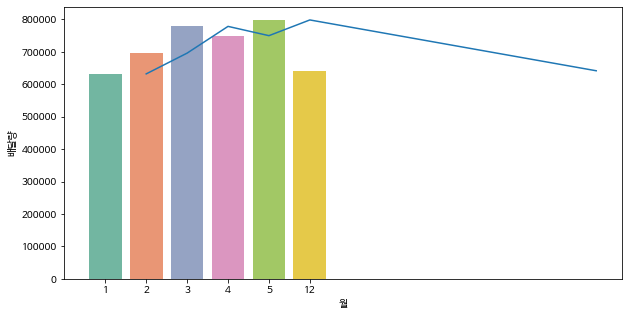

In [55]:
plt.figure(figsize=(10,5))
palette=sns.color_palette("Set2")

dlvr_call_month=dlvr_call.groupby('month').count().reindex([12,1,2,3,4,5],axis='index')
sns.countplot(x='month',data=dlvr_call,palette=palette)
sns.lineplot(x='month',y='SN',data=dlvr_call_month)
plt.xlabel('월')
plt.ylabel('배달량')

In [56]:
dlvr_call.groupby('month').count().reindex([12,1,2,3,4,5],axis='index')

,SN,PROCESS_DT,DLVR_REQUST_ENTRPS_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_ENTRPS_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_BRTC_NM,DLVR_STORE_SIGNGU_NM,DLVR_STORE_LEGALDONG_NM,DLVR_STORE_LI_NM,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_BRTC_NM,DLVR_DSTN_SIGNGU_NM,DLVR_DSTN_LEGALDONG_NM,DLVR_DSTN_LI_NM,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_NM,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_RECPT_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,date
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12,641606,641606,641606,641606,641606,641606,641606,641606,641606,641606,641606,641606,641606,641606,641606,641606,641606,641606,641606,641606,641606,641606,641606,641606,641606,641606,160668,641606,630826,627251,627977,641606,641606
1,631977,631977,631977,631977,631977,631977,631977,631977,631977,631977,631977,631977,631977,631977,631977,631977,631977,631977,631977,631977,631977,631977,631977,631977,631977,631977,155352,631977,623026,619662,620590,631977,631977
2,696024,696024,696024,696024,696024,696024,696024,696024,696024,696024,696024,696024,696024,696024,696024,696024,696024,696024,696024,696024,696024,696024,696024,696024,696024,696024,166405,696024,683340,679353,680346,696024,696024
3,778472,778472,778472,778472,778472,778472,778472,778472,778472,778472,778472,778472,778472,778472,778472,778472,778472,778472,778472,778472,778472,778472,778472,778472,778472,778472,163611,778472,768834,764273,765785,778472,778472
4,749856,749856,749856,749856,749856,749856,749856,749856,749856,749856,749856,749856,749856,749856,749856,749856,749856,749856,749856,749856,749856,749856,749856,749856,749856,749856,190671,749856,742649,738146,739738,749856,749856
5,798336,798336,798336,798336,798336,798336,798336,798336,798336,798336,798336,798336,798336,798336,798336,798336,798336,798336,798336,798336,798336,798336,798336,798336,798336,798336,281679,798336,789945,785659,786988,798336,798336
